<center><h2> Bike Sharing Data Analysis and Visualization</h2></center>
    
<h4> The dataset, day.csv, contains daily bike rental data from 1-1-2011 to 12-31-2012</h4>
<h4> It contains weather related data, such as temp, humidity, and windspeed</h4> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bike_sharing = pd.read_csv('day.csv')

bike_sharing.head(10)
#bike_sharing.info()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


<h3>Step 1: Plot daily bike rental numbers for the entire 2-year period</h3>
<h4>1. The Y-axis is the column data 'cnt'</h4>
<h4>2. The X-axis is the column data 'dteday', in the format of yyyy-mm-dd.</h4>
<h4>3. However, it is treated as a string in Python. We will first convert it to a time series using pd.to_datetime() method</h4>  

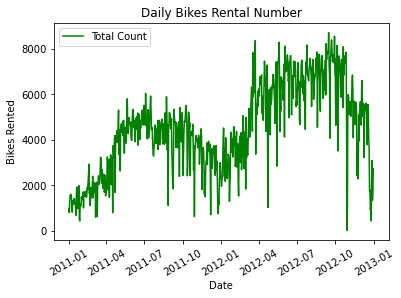

In [3]:
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])

plt.plot(bike_sharing['dteday'], bike_sharing['cnt'], 'g',
        label='Total Count')

plt.xticks(rotation=30)     # rotate the xtick labels by 30% for better viewing
plt.ylabel('Bikes Rented')
plt.xlabel('Date')

plt.title('Daily Bikes Rental Number')
plt.legend()

plt.show()

<h3>Step 2: Plot daily temperature for the entire 2-year period</h3>
<h4>The Y-axis is the column data 'temp'</h4>

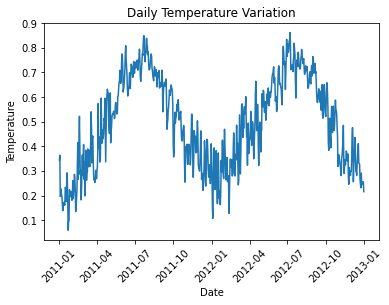

In [4]:
plt.plot(bike_sharing['dteday'], bike_sharing['temp'])

plt.ylabel('Temperature')
plt.xlabel('Date')

plt.title('Daily Temperature Variation')
plt.xticks(rotation=45)
plt.show()

<h3>Step 3: Correlation between bike rental and daily temperature</h3>
<h4>The daily rental number appears to be highly correlated to the temperature. We will make a scatter plot to visualize it</h4>

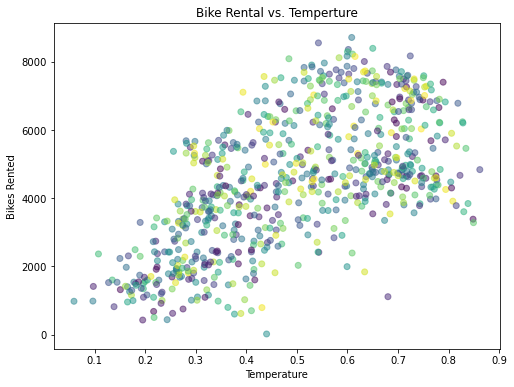

In [5]:
plt.figure(figsize=(8,6))
colors = np.random.rand(731)
plt.scatter(bike_sharing['temp'], bike_sharing['cnt'], s=None, c=colors, alpha=0.5)

plt.xlabel('Temperature')
plt.ylabel('Bikes Rented')
plt.title('Bike Rental vs. Temperture')
plt.show()

<h3>Step 4: Correlation between bike rental and daily windspeed</h3>
<h4>How is the daily rental number correlated to the windspeed? We will make a scatter plot to visualize it</h4>

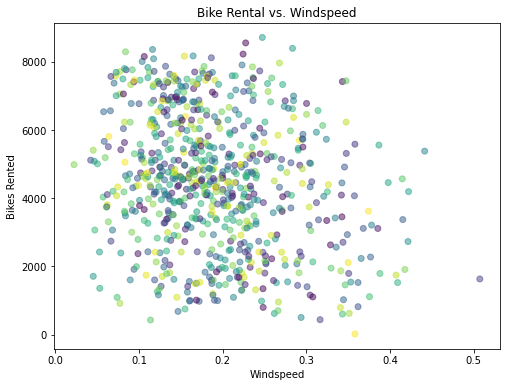

In [6]:
plt.figure(figsize=(8,6))

colors = np.random.rand(731)
plt.scatter(bike_sharing['windspeed'], bike_sharing['cnt'], s=None, c=colors, alpha=0.5)

plt.xlabel('Windspeed')
plt.ylabel('Bikes Rented')
plt.title('Bike Rental vs. Windspeed')
plt.show()

<h3>Step 5: Let's quantify the correlation by finding Pearson correlation coefficient between 2 sequences.</h3>
<h4>This can be done by using pandas pd.Series.corr(sequence) method</h4>
<h4>1. Correlation coefficient between bike rental counts and temperature</h4>
<h4>2. Correlation coefficient between bike rental counts and windspeed</h4>

In [7]:
# both bike_sharing['cnt'] and bike_sharing['temp'] are pd.Series

cor_bike_temp = bike_sharing['cnt'].corr(bike_sharing['temp'])

cor_bike_wind = bike_sharing['cnt'].corr(bike_sharing['windspeed'])

print ("correlation vs. temperature", cor_bike_temp)
print ("correlation vs. windspeed", cor_bike_wind)

correlation vs. temperature 0.6274940090334922
correlation vs. windspeed -0.23454499742167007


<h3>Actully, we can use pd.DataFrame.corr to calcualte the pariwise correlation between any two columns in a dataframe. This is the "Correlation Matrix".</h3>

In [26]:
corr = bike_sharing.corr()

# But not all of them are interesting, so we can look at certain columns
bike_sharing.corr()[['casual','registered','cnt']]

corr

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


### Seaborn heatmap is a good way to visualize the correlation matrix 

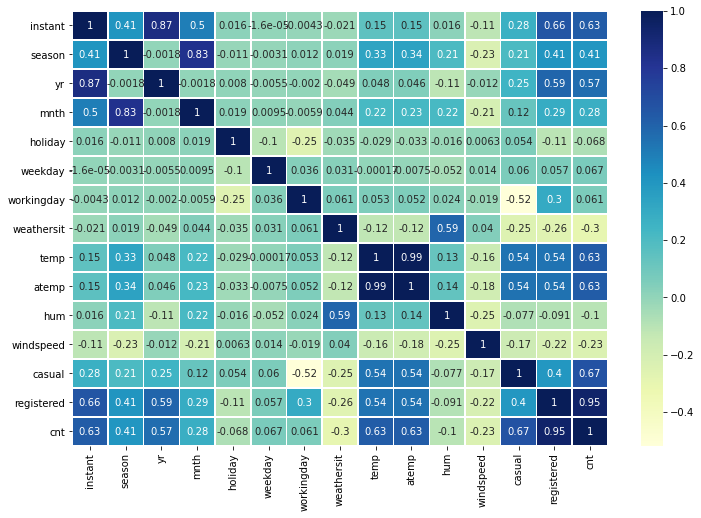

In [27]:
import seaborn as sns

plt.figure(figsize=(12,8))

sns.heatmap(corr, cmap="YlGnBu", linewidths=0.5, annot=True)
plt.show()

<h3>Step 6: Let's analyze the average bike rentals on the day of week. </h3>
<h4>1. The 'weekday' column describes the day as 0 (Sunday) to 6 (Saturday)</h4>
<h4>2. Calculate the average bike rental counts ('casual' & 'registered') for each weekday</h4>
<h4>3. Plot a bar chart to visualize the comparison</h4>

In [29]:
# Use groupby('weekday').mean() to find the average rentals for 'casual' and 'registered' users

wday_ave = bike_sharing.groupby('weekday').mean()[['casual', 'registered']]#.reset_index() 

wday_ave

,casual,registered
weekday,,
0,1338.295238,2890.533333
1,674.133333,3663.990476
2,556.182692,3954.480769
3,551.144231,3997.394231
4,590.961538,4076.298077
5,752.288462,3938.000000
6,1465.257143,3085.285714


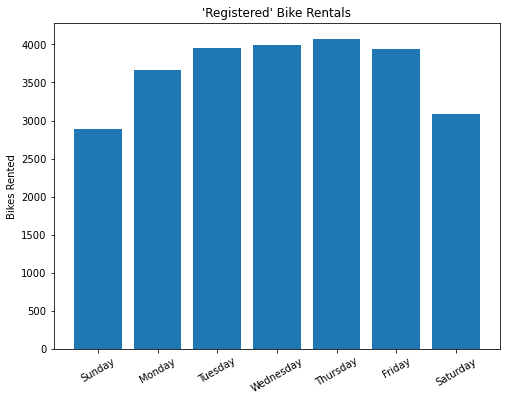

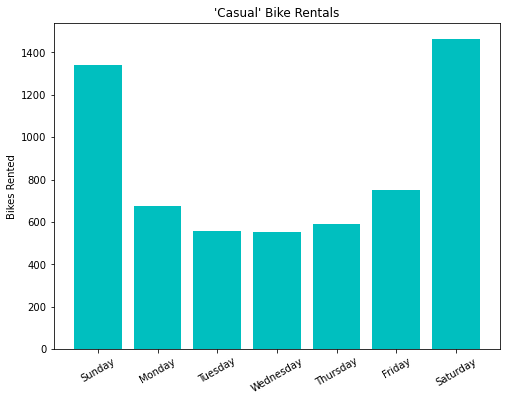

In [11]:
plt.figure(figsize=(8,6))

# Plot a simple vertical bar chart for average 'registered' for each weekday

plt.bar(wday_ave.index, wday_ave['registered'])

# Fix the xticks labels
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
          labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday'],
          rotation=30)

plt.ylabel('Bikes Rented')
plt.title('\'Registered\' Bike Rentals')
plt.show()

plt.figure(figsize=(8,6))

# Plot a simple vertical bar chart for average 'casual' for each weekday
plt.bar(wday_ave.index, wday_ave['casual'], color='c')

# Fix the xticks labels
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
          labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday'],
          rotation=30)

plt.ylabel('Bikes Rented')
plt.title('\'Casual\' Bike Rentals')
plt.show()

<h3>Two more bar charts that are also visually powerful</h3>
<h4>1. Grouped bar chart: comparing 'registered' and 'casual' side by side</h4>
<h4>2. Stacked bar chart: stack 'causal" on top of "registered" (essentially, "cnt") </h4>

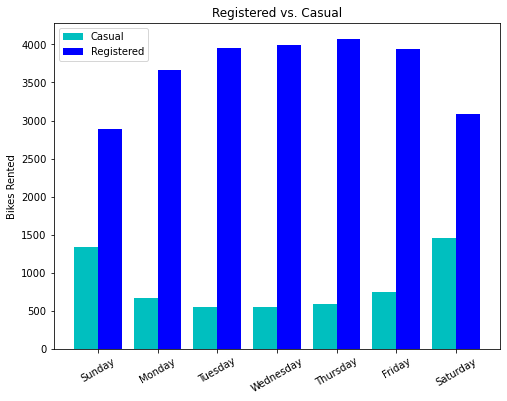

In [12]:
plt.figure(figsize=(8, 6))       # Change the default plot size 

# Grouped bar chart needs to adjust the locations of each bar
x_loc = np.arange(len(wday_ave))   # [0,1,2,3,4,5,6]
width = 0.4   # the width of each bar

# plot two bar charts, centered around the xticks location
plt.bar(x_loc-width/2, wday_ave['casual'], width, color='c', label='Casual')
plt.bar(x_loc+width/2, wday_ave['registered'], width, color='b', label='Registered')

# Fix the xticks labels
plt.xticks(ticks=x_loc,
           labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday'],
           rotation=30)

plt.ylabel('Bikes Rented')
plt.title('Registered vs. Casual')
plt.legend()
plt.show()

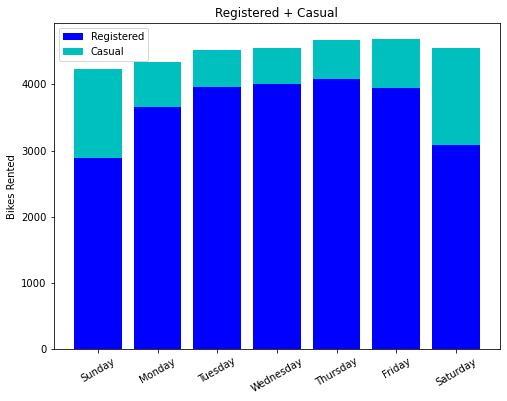

In [13]:
plt.figure(figsize=(8, 6))       # Change the default plot size 

# Stacked bar chart: essentially plot two bar charts on top of each other
plt.bar(wday_ave.index, wday_ave['registered'], color='b', label='Registered')
plt.bar(wday_ave.index, wday_ave['casual'], bottom=wday_ave['registered'], color='c', label='Casual')

# Fix the xticks labels
plt.xticks(ticks=x_loc,
           labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday'],
           rotation=30)

plt.ylabel('Bikes Rented')
plt.title('Registered + Casual')
plt.legend()
plt.show()

<h3>Step 7:  Analyze how the daily bike rental counts are distributed</h3>
<h4>We want to know how many days, for example, the daily bike rental count is between 3000 to 4000 </h4>
<h4>This kind of distribution chart is done by histogram</h4>

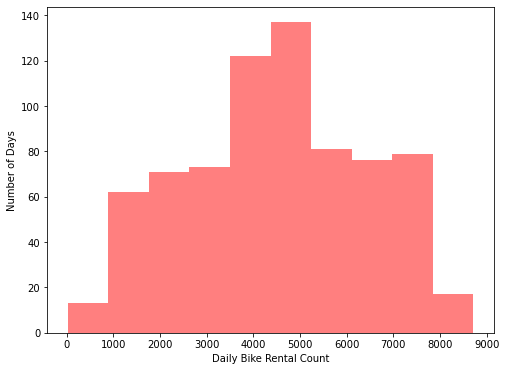

In [25]:
plt.figure(figsize=(8, 6)) 

# Divide the 'cnt' column data into N bins (each with size 1000)

N = int(bike_sharing['cnt'].max()/1000) + 1
bins = 1000*np.arange(N+1)       # bins =[0,1000,2000,3000,....N*1000]

plt.hist(bike_sharing['cnt'], color='r', alpha=0.5)
plt.xticks(ticks=bins, labels=None)
plt.xlabel('Daily Bike Rental Count')
plt.ylabel('Number of Days')
 
plt.show()